In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt
from ipywidgets import interact
import sys
from os import path
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


out_dir='cont_data_files/'

# parameters
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3

vF=1e6
B=10 # Tesla
hwc=vF*sqrt(2*hbar*elec*B)
lB=np.sqrt(hbar/(elec*B))


def Eg_plotter_vs_mu(Nx,Lx,Ls,params):
    
    m_n=params['m_n']
    mu_sc=params['mu_sc']
    m_sc=params['m_sc']
    
    D1=params['D1']
    D2=params['D2']

    lRx= params['lRx']
    lRy= params['lRy']
    lso= params['lso']
    gs= params['gs']
    gn= params['gn']
    f1='Eg_paw_vs_mu_Nx_%d_Lxs_%d_%d_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
      (Nx,Lx,Ls,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
       D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)

    fname=out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        nu_sw = npzfile['nu_list']
        kps = npzfile['kps']
        Egs = npzfile['Egs']

    return nu_sw, kps, Egs

def Eg_plotter_vs_Ls(Nx,Lx,params,one_two):
    
    nu=params['nu']
    m_n=params['m_n']
    mu_sc=params['mu_sc']
    m_sc=params['m_sc']
    
    D1=params['D1']
    D2=params['D2']

    lRx= params['lRx']
    lRy= params['lRy']
    lso= params['lso']
    gs= params['gs']
    gn= params['gn']
    
    if one_two=='2':
        f1='Eg_fine2_paw_vs_Ls_Nx_%d_Lxs_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
          (Nx,Lx,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
           D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
    else:
        f1='Eg_fine_paw_vs_Ls_Nx_%d_Lxs_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
          (Nx,Lx,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
           D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)


    fname=out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        Ls_sw = npzfile['Ls_list']
        kps = npzfile['kps']
        Egs = npzfile['Egs']

    return Ls_sw, kps, Egs

Energy gap as a function of nu

/tmp/yes/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


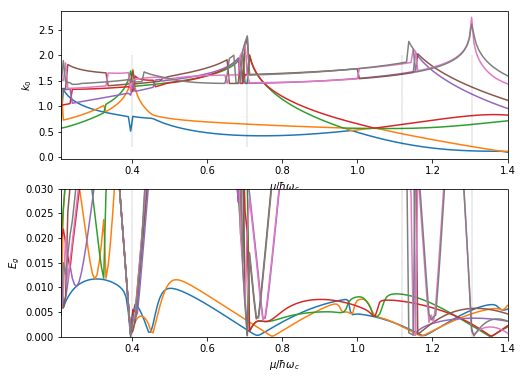

In [3]:
# system dimensions (in units of lB)
Lx_list=[8]
Ls=6

D1=0.5*hwc #10*meV
D2=0.6*hwc #10*meV
m_n=0.1*hwc

lRx= 1.*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.3*hwc

m_sc=3*hwc 
mu_sc=8*hwc
params=dict(m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)

Nx_list=[100]

plt.figure(figsize=(8,6))

for Nx in Nx_list:
    for Lx in Lx_list:
        nu_sw, kps, Egs = Eg_plotter_vs_mu(Nx,Lx,Ls,params)
        plt.subplot(2,1,1)
        plt.plot(nu_sw,kps.T)

        plt.subplot(2,1,2)
        plt.plot(nu_sw,Egs.T/hwc)

def plot_ll(Nll,ym):
    ill=np.arange(Nll)
    E1=np.reshape(np.sqrt(ill+(m_n/hwc)**2),[1,Nll])
    Eplot= np.concatenate((E1,E1),axis=0)
    yvals=np.reshape(ym,[2,1])
    lw=0.2
    plt.plot( Eplot-gn/hwc,yvals,'k--',linewidth=lw)
    plt.plot( Eplot+gn/hwc,yvals,'k--',linewidth=lw)
    plt.plot( -Eplot-gn/hwc,yvals,'k--',linewidth=lw)
    plt.plot( -Eplot+gn/hwc,yvals,'k--',linewidth=lw)



plt.subplot(2,1,1)
y_nu=np.array([0.2,2])
plot_ll(4,y_nu)
plt.xlim(nu_sw.min(),nu_sw.max())
plt.xlabel(r'$\mu/\hbar\omega_c$')
plt.ylabel(r'$k_0$')

plt.subplot(2,1,2)
y_E=np.array([0.,.1])
plot_ll(4,y_E)
plt.xlim(nu_sw.min(),nu_sw.max())
plt.ylim(0,0.03)
plt.xlabel(r'$\mu/\hbar\omega_c$')
plt.ylabel(r'$E_g$');

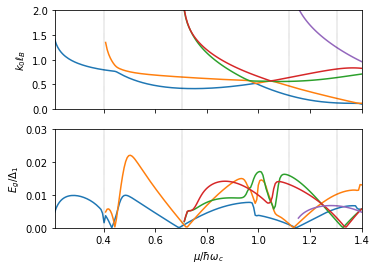

In [4]:
# plot for the notes
# system dimensions (in units of lB)
Lx_list=[8]
Ls=6

D1=0.5*hwc #10*meV
D2=0.6*hwc #10*meV
m_n=0.1*hwc

lRx= 1.*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.3*hwc

m_sc=3*hwc 
mu_sc=8*hwc
params=dict(m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)

Nx_list=[200]

plt.figure(figsize=(5.5,4))

for Nx in Nx_list:
    for Lx in Lx_list:
        nu_sw, kps, Egs = Eg_plotter_vs_mu(Nx,Lx,Ls,params)
        ax1=plt.subplot(2,1,1)
        kps[0,31]=0.8
        
        plt.plot(nu_sw,kps[0,:].T)
        plt.plot(nu_sw[33:],kps[1,33:].T)
        plt.plot(nu_sw[84:],kps[2,84:].T)
        plt.plot(nu_sw[84:],kps[3,84:].T)
        plt.plot(nu_sw[158:],kps[4,158:].T)
        ax1.xaxis.set_ticklabels([])
#         ax1.xaxis.set_minor_locator(AutoMinorLocator(2))

        plt.subplot(2,1,2)
        plt.plot(nu_sw,Egs[0,:].T/hwc)
        plt.plot(nu_sw[33:],Egs[1,33:].T/D1)
        plt.plot(nu_sw[84:],Egs[2,84:].T/D1)
        plt.plot(nu_sw[84:],Egs[3,84:].T/D1)
        plt.plot(nu_sw[158:],Egs[4,158:].T/D1)


plt.subplot(2,1,1)
y_nu=np.array([0,2])
plot_ll(4,y_nu)
plt.xlim(nu_sw.min(),nu_sw.max())
plt.ylim(0,2)
# plt.xlabel(r'$\mu/\hbar\omega_c$')
plt.ylabel(r'$k_0\ell_B$')

plt.subplot(2,1,2)
y_E=np.array([0.,.1])
plot_ll(4,y_E)
plt.xlim(nu_sw.min(),nu_sw.max())
plt.ylim(0,0.03)
plt.xlabel(r'$\mu/\hbar\omega_c$')
plt.ylabel(r'$E_g/\Delta_1$');

plt.savefig('figs/Eg_vs_mu_Nx_%d.pdf' % (Nx))

As a function of sc width

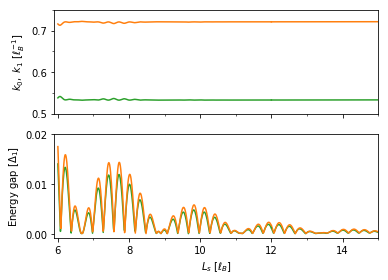

In [13]:

# system dimensions (in units of lB)
Lx_list=[8]

D1=0.5*hwc #10*meV
D2=0.6*hwc #10*meV
m_n=0.1*hwc

lRx= 1.*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.3*hwc

nu =0.55
m_sc=3*hwc 
mu_sc=8*hwc
params=dict(nu=nu, m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)

Nx_list=[200]

plt.figure(figsize=(5.5,4))

for Nx in Nx_list:
    for Lx in Lx_list:
        Ls_sw, kps, Egs = Eg_plotter_vs_Ls(Nx,Lx,params,'2')
        ax1=plt.subplot(2,1,1)
        plt.plot(Ls_sw,kps[0,:].T, c='C2')
        plt.plot(Ls_sw,kps[1,:].T, c='C1')

        ax2=plt.subplot(2,1,2)
        plt.plot(Ls_sw,Egs[0,:].T/D1, c='C2')
        plt.plot(Ls_sw,Egs[1,:].T/D1, c='C1')

        Ls_sw, kps, Egs = Eg_plotter_vs_Ls(Nx,Lx,params,'1')
        plt.subplot(2,1,1)
        plt.plot(Ls_sw,kps[0,:].T, c='C2')
        plt.plot(Ls_sw,kps[1,:].T, c='C1')
        ax1.xaxis.set_ticklabels([])
#         plt.xlim(Ls_sw.min(),Ls_sw.max())
        plt.xlim(5.9,15)
        plt.xticks(np.arange(6,15.1,2))
        plt.ylabel(r'$k_0\ [\ell_B^{-1}]$')
#         plt.ylim(0.92,0.94) # nu=0.3
#         plt.yticks(np.arange(0.92,0.95,0.01))
        plt.ylabel(r'$k_0,\ k_1\ [\ell_B^{-1}]$')
        plt.ylim(0.5,0.75) # nu=0.55
        plt.yticks(np.arange(0.5,0.75,0.1))
        ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
        ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
#         ax1.tick_params(axis="x", direction="in")
#         ax1.tick_params(which="minor", axis="x", direction="in")
        plt.tight_layout()

  
        plt.subplot(2,1,2)
        plt.plot(Ls_sw,Egs[0,:].T/D1, c='C2')
        plt.plot(Ls_sw,Egs[1,:].T/D1, c='C1')
#         plt.xlim(Ls_sw.min(),Ls_sw.max())
        plt.xlim(5.9,15)
        plt.xlabel(r'$L_s\ [\ell_B]$')
        plt.xticks(np.arange(6,15.1,2))
#         plt.ylabel(r'$E_{0}\ [\Delta_1]$');
        plt.yticks(np.arange(0.,0.021,0.01)) # nu=0.3
        plt.ylabel(r'Energy gap $[\Delta_1]$');
        ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
        plt.tight_layout()


plt.savefig('figs/Eg_vs_Ls_Nx_%d_nu_%d.pdf' % (Nx,100*nu))

In [70]:
hbar*vF/D1/lB

1.4142135623730951